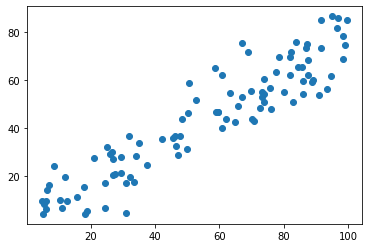

In [19]:
#看看用梯度如何实现的PCA
#https://blog.csdn.net/weixin_43312354/article/details/105653308?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163901178016780366538007%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=163901178016780366538007&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-105653308.first_rank_v2_pc_rank_v29&utm_term=PCA
import numpy as np
import matplotlib.pyplot as plt

X = np.empty([100,2])
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0., 10., size=100)

plt.scatter(X[:,0],X[:,1])
plt.show()

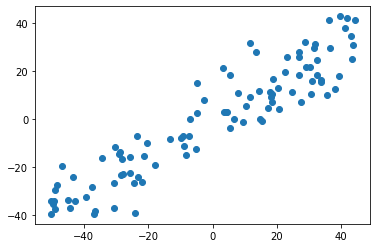

In [20]:
def demean(X):
    # axis=0按列计算均值，即每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))

X_demean = demean(X)
# 注意看数据分布没变，但是坐标已经以原点为中心了
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [21]:
def Var(w,X):     #我们这里可以把方差作为某种cost function
    return np.sum((X.dot(w)**2))/len(X)

def gredience(w,X):    #梯度梯度
    return X.T.dot(X.dot(w))*2./len(X)

In [22]:
def direction(w):
    return w / np.linalg.norm(w)  #利用范数约束w为单位长度

In [23]:
# 梯度上升法代码
def gradient_ascent( X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = gredience(w,X)
        last_w = w
        w = last_w + eta * gradient
        w = direction(w)    # 将w转换成单位向量
        if (abs(Var(w,X) - Var(last_w,X)) < epsilon):
            break
        cur_iter += 1
    return w

In [24]:
initial_w = np.random.random(X.shape[1])
eta = 0.001
w = gradient_ascent( X_demean, initial_w, eta)

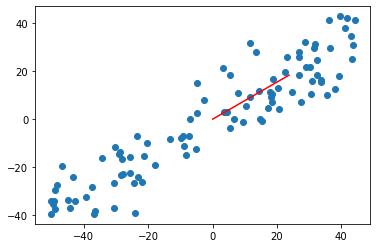

In [25]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30], color='red')
plt.show()

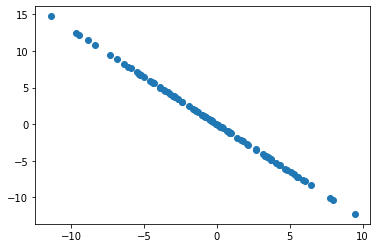

In [26]:
X_new = X - X.dot(w).reshape(-1,1) * w
plt.scatter(X_new[:,0], X_new[:,1])
plt.show()

In [27]:
w_new = gradient_ascent(X_new, initial_w, eta)

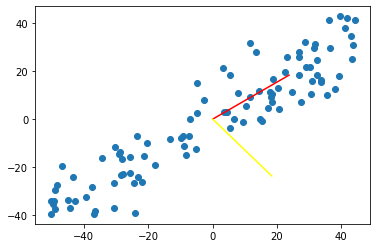

In [28]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30], color='red')
plt.plot([0,w_new[0]*30],[0,w_new[1]*30], color='yellow')
plt.show()

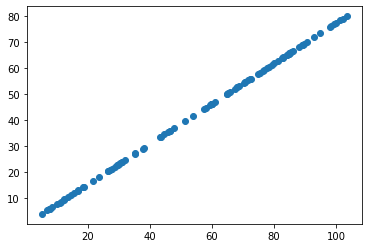

In [29]:
X_f = X.dot(w).reshape(-1,1) * w
plt.scatter(X_f[:,0], X_f[:,1])
plt.show()